Esercizio per Anicca Vision:
Team A:
Francesco,Bruco,Enrico,Elia,Mike

Team B: Greta, Stefano, Samuele,Pese, Marco,Gaetano

Il Team A deve svolgere il compito entro mercoledì alle ore 20.00
Vietate comunicazioni tra Team (Greta e Francesco non parlate di questo)
Mentre il Team A lavora il B legge ma non interviene per nessuna ragione.
Posso intervenire solo io in caso di errori clamorosi.

Ipotesi sulla quale lavorare:
1) RENDIMENTI T-Bond al 6%
2) Costo del denaro in yen allo -0,1% come adesso.
3) Investiamo 100.000 usd
4) Bond 10 anni

Il Team A vuole creare una posizione data da:
- T-Bond ( per facilitá ipotizziamo prezzo 100 e cedola al 6%)
-darlo in garanzia e indebitarsi in yen
- cambiare gli yen in altri T-Bond sempre con rendimento 6%

Scopo della squadra A dire dalla A alla Z come impostare una posizione del genere, come si muove nel tempo, rischi, prospettive, probabile guadagno, cigni neri potenziali etccc.
NON SERVONO tecnicismi e formule ma una bella spiegazione facilmente comprensibile

GRUPPO B:
Una volta pubblicata la proposta della squadra A dovrá trovare gli errori, le debolezze, i rischi non valutati etc etc etc

Praticamente A mi vuole vendere questa posizione e B mi vuole far riflettere sui possibili problemi.

SCHEMA
 • Con 100k$ compro i T-bond.
 • Questi T-bond li metto come garanzia per prendere Yen (valore prestato in dollari 80K).
 • Compro altri 70k$ di T-bond (gli altri 10k$ inizio a ripagare il debito in attesa delle cedole annuali).
 • Con le cedole annuali, una di esse la utilizzerei per uno short a leva su dollaro yen con stop loss, mentre le altre le utilizzerei per ripagare il debito sullo yen.
 • Durante tutto questo periodo, tengo sotto controllo il mercato e i nostri bond per monitorare il livello raggiunto dai tassi e l'inflazione, agendo di conseguenza e ipotizzando anche una chiusura anticipata (a profitto) degli stessi o parte di essi.
 • Se dovessi chiudere anticipatamente perché in buon profitto, andrei a cercare zone del secondo mondo in crescita per prendere un immobile da mettere a reddito con un minimo del 5/6% di ritorno annuale (simile a possedere il bond di prima con l'aggiunta di una proprietà immobiliare), oppure investirei in asset che proteggono dall'inflazione, come l'oro.

Rischi / Cigni neri: 
 ⁃ Se, invece di scendere, i tassi salgono al 6/7%, non solo saremmo in perdita sul prezzo delle obbligazioni, ma anche con la leva, dato che il dollaro si rafforza rispetto allo yen. 
 ⁃ Nei prossimi 10 anni potrebbero verificarsi eventi geopolitici che porterebbero a una fluttuazione delle valute yen/dollaro, come sanzioni da parte della Cina, Russia o altre guerre che influenzerebbero l'economia.
 ⁃ Altro rischio da considerare sono alti tassi del 6/7% con un'alta inflazione al 5/6%, rendendo le nostre cedole inutili e costringendoci a mantenere la posizione in T-bond fino alla scadenza. L'unica soluzione sarebbe entrare gradualmente in asset anti-inflazionistici come l'oro.
 ⁃ Dato l'elevato indebitamento del Giappone, potrebbe scoppiare una bolla in Giappone, con conseguenze pertanto svalutando ulteriormente la valuta. 

Cigni bianchi: 
 ⁃ Se l'economia crolla e i tassi vengono riportati al 2/1.5%, i tassi rimangono invariati e l'inflazione è bassa, potremmo aprire altre posizioni con le cedole e ripagare il debito.

In [9]:
 import pandas as pd
import pandas as pd
interestRateUSA = pd.read_csv("/Users/stefanobutera/Desktop/FinancialEngineering/BondUSA1.csv")
interestRateJAP = pd.read_csv("/Users/stefanobutera/Desktop/FinancialEngineering/BondJPM123.csv")

interestRateUSA['DATE'] = pd.to_datetime(interestRateUSA['DATE']) # Filtro per le righe in cui il giorno è il primo del mese
interestRateUSA = interestRateUSA[interestRateUSA['DATE'].dt.day == 1] 
interestRateUSA = interestRateUSA.iloc[12:]

# Assicurati che i due DataFrame abbiano la stessa lunghezza
if len(interestRateUSA) > len(interestRateJAP):
    interestRateUSA = interestRateUSA.iloc[:len(interestRateJAP)]
elif len(interestRateJAP) > len(interestRateUSA):
    interestRateJAP = interestRateJAP.iloc[:len(interestRateUSA)]
    
interestRateJAP['DATE'] = interestRateUSA['DATE'].values
interestRateUSA.set_index('DATE', inplace=True) 
interestRateJAP.set_index('DATE', inplace=True)
serieUSA = interestRateUSA['DFF']
serieJP = interestRateJAP['open']

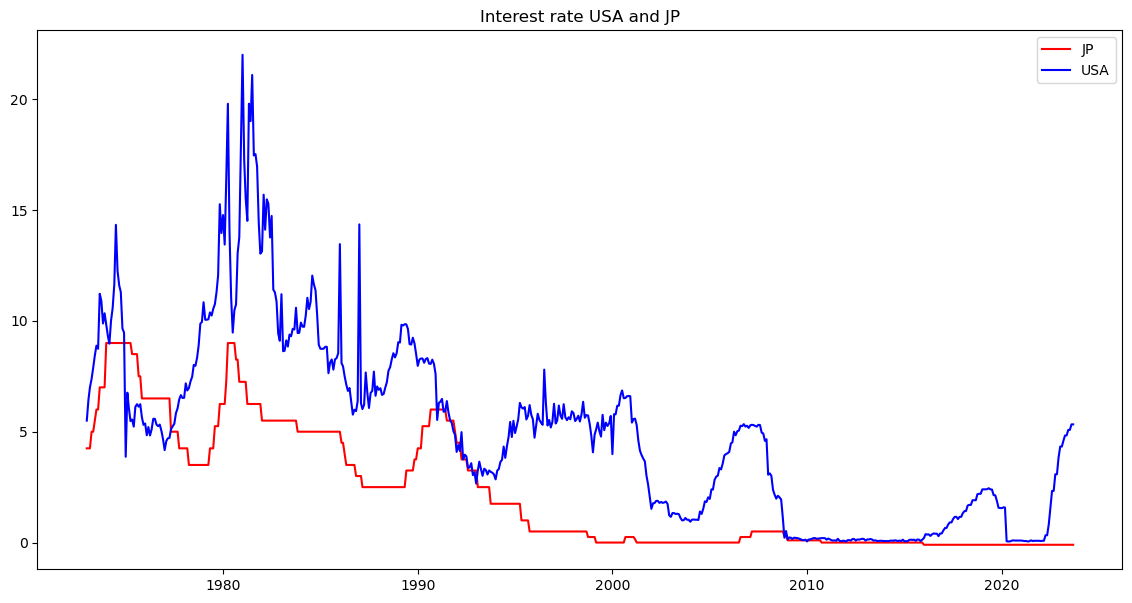

In [10]:
#plot

import matplotlib.pyplot as plt 
plt.figure(figsize=(14,7)) 
plt.plot(serieJP, label='JP', color='red')
plt.title('Interest rate USA and JP')
plt.plot(serieUSA, label='USA', color='blue')
plt.legend()
plt.show()

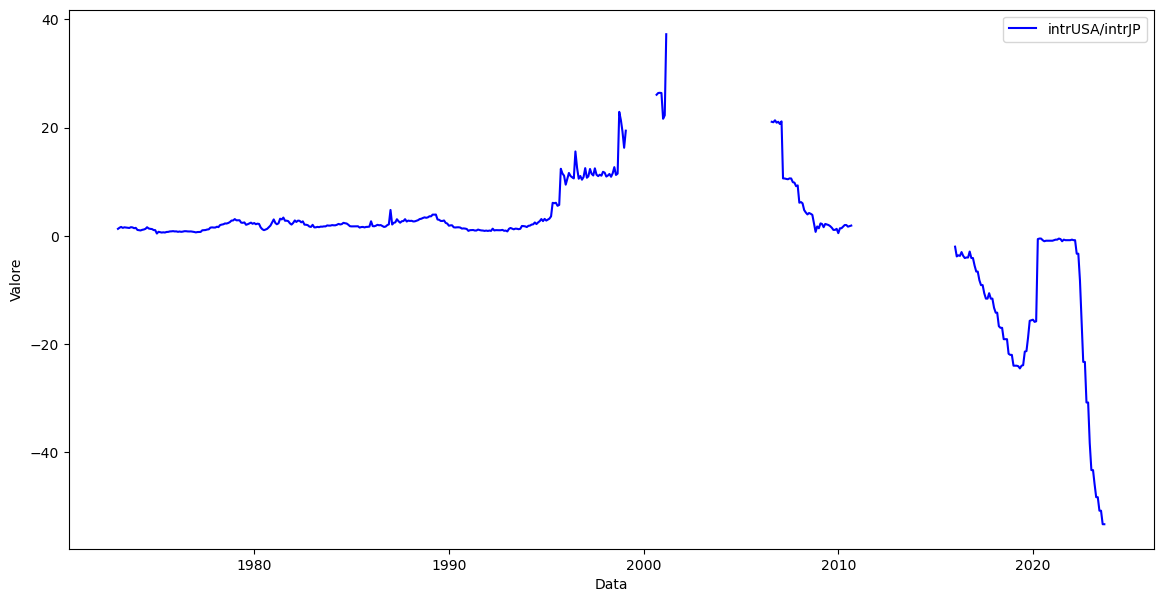

In [13]:
 # valutiamo il rapporto tra i due tassi d'interesse nel tempo
import numpy as np
serieUSA = pd.to_numeric(serieUSA, errors='coerce') 
serieJP = pd.to_numeric(serieJP, errors='coerce')
rap = serieUSA.div(serieJP, fill_value=np.nan) 
plt.figure(figsize=(14,7))
plt.plot(rap, label='intrUSA/intrJP', color='blue') 
plt.xlabel('Data')
plt.ylabel('Valore')
plt.legend()
plt.show()

### Test Engle-Granger 1: Long term relation test

In [14]:
 import statsmodels.api as sm
# Esegui il test di cointegrazione Test Engle-Granger:
coint_t, p_value, crit_value = sm.tsa.coint(serieUSA, serieJP)
print(f'T-statistica di cointegrazione: {coint_t}') 
print(f'P-value: {p_value}')
print(f'Valori critici: {crit_value}')

T-statistica di cointegrazione: -3.4591115225951365
P-value: 0.03619631003765517
Valori critici: [-3.91454369 -3.34619796 -3.05143302]


Il valore della T-statistica di cointegrazione è -3.459, che è più grande (in termini assoluti) rispetto ai valori critici a tutti i livelli di significatività (90%, 95% e 99%), suggerendo che le due serie sono cointegrate. Il p-value è 0.036, che è inferiore a 0.05, confermando ulteriormente che le due serie sono cointegrate al livello di significatività del 5%.

### Test Engle-Granger 2:

In [16]:
import statsmodels.api as sm
# Esegui il test di cointegrazione Test Engle-Granger:
coint_t, p_value, crit_value = sm.tsa.coint(serieJP,serieUSA)
print(f'T-statistica di cointegrazione: {coint_t}') 
print(f'P-value: {p_value}')
print(f'Valori critici: {crit_value}')

T-statistica di cointegrazione: -3.3047038035925946
P-value: 0.054092305402835425
Valori critici: [-3.91454369 -3.34619796 -3.05143302]


. La cointegrazione suggerisce che le serie condividono una tendenza comune a lungo termine, ma ciò non garantisce che le divergenze a breve termine si correggeranno rapidamente.

fare un modello di regressione e fare la serie storica combinando le due variabili e la voglio che sia mean reverting e deve essere senza trend



### Test di Johansen 1:

In [20]:
from statsmodels.tsa.vector_ar.vecm  import coint_johansen 
import numpy as np
data_matrix = np.column_stack([serieUSA, serieJP])
# Esegui il test (assumendo un ordine di ritardo di 1 per la VAR)
result = coint_johansen(data_matrix, det_order=0, k_ar_diff=1)
 # Visualizza i risultati
print("Autovalori (valori propri):", result.lr1)
print("Statistiche del test (trace statistic):",result.trace_stat) 
print("Valori critici (al 90%, 95% e 99%):",result.trace_stat_crit_vals)

Autovalori (valori propri): [19.83214704  1.51905175]
Statistiche del test (trace statistic): [19.83214704  1.51905175]
Valori critici (al 90%, 95% e 99%): [[13.4294 15.4943 19.9349]
 [ 2.7055  3.8415  6.6349]]


Questo test fornisce due statistiche, la statistica della traccia e la statistica del massimo autovalore. In questo caso, stiamo guardando solo la statistica della traccia. Gli autovalori sono 19.83 e 1.52. La statistica della traccia per il primo autovalore (19.83) è superiore ai valori critici al 90%, 95% e 99%, indicando che almeno una delle serie è cointegrata. Tuttavia, la statistica della traccia per il secondo autovalore (1.52) è inferiore ai valori critici a tutti i livelli di significatività, suggerendo che non c’è una seconda relazione di cointegrazione.

### Test di Johansen 2:

In [21]:
from statsmodels.tsa.vector_ar.vecm  import coint_johansen 
import numpy as np
data_matrix = np.column_stack([serieJP,serieUSA])
# Esegui il test (assumendo un ordine di ritardo di 1 per la VAR)
result = coint_johansen(data_matrix, det_order=0, k_ar_diff=1)
 # Visualizza i risultati
print("Autovalori (valori propri):", result.lr1)
print("Statistiche del test (trace statistic):",result.trace_stat) 
print("Valori critici (al 90%, 95% e 99%):",result.trace_stat_crit_vals)

Autovalori (valori propri): [19.83214704  1.51905175]
Statistiche del test (trace statistic): [19.83214704  1.51905175]
Valori critici (al 90%, 95% e 99%): [[13.4294 15.4943 19.9349]
 [ 2.7055  3.8415  6.6349]]


In questo caso non abbiamo variazione nel risultato del test al variare dell'ordine delle serie

sia il test di Engle-Granger che il test di Johan- sàen suggeriscono che esiste una relazione di cointegrazione tra i tassi di interesse americani e giapponesi. Questo significa che, nonostante le fluttuazioni a breve termine, le due serie tendono a muoversi insieme a lungo termine.

2 mettiamo le due serie storiche in un df e calcoliamo la cov poi autoval e autovet con le colonne della matrice degli autovettori abbiamo i pesi di una possibile combinazione lineare stazionaria a quel punto plottiamo

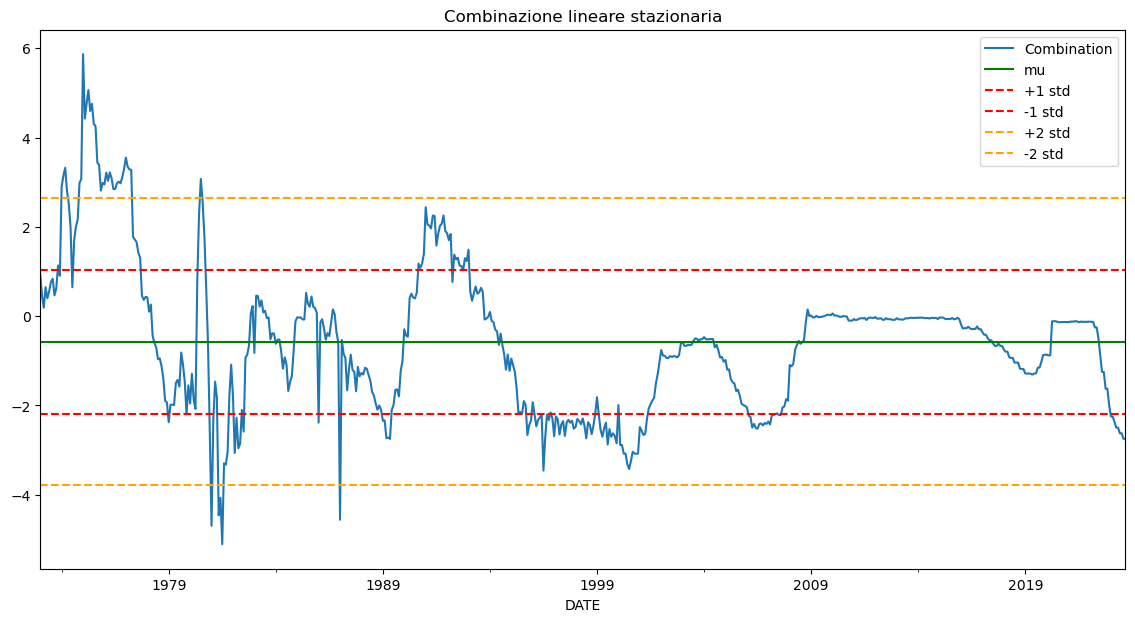

In [46]:
df = pd.DataFrame({
    'USA': serieUSA.values,
    'JP': serieJP.values
}, index=serieUSA.index)


df.head()
cov_matrix = df.cov()
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

# Ordinare gli autovalori in ordine decrescente e prendere l'autovettore corrispondente al più piccolo autovalore.
min_index = np.argmin(eigenvalues)
eigenvector_min = eigenvectors[:, min_index]

# 4. Utilizzare gli autovettori come pesi per creare una combinazione lineare delle serie.
df['Combination'] = df['USA'] * eigenvector_min[0] + df['JP'] * eigenvector_min[1]

# Calcola la media e la deviazione standard
mu = df['Combination'].mean()
std = df['Combination'].std()

# 5. Plottare la combinazione lineare.
plt.figure(figsize=(14, 7))
df['Combination'].plot(title='Combinazione lineare stazionaria')

plt.axhline(y=mu, label='mu', color='green')
plt.axhline(y=mu + std, label='+1 std', color='red', linestyle='--')
plt.axhline(y=mu - std, label='-1 std', color='red', linestyle='--')
plt.axhline(y=mu + 2*std, label='+2 std', color='orange', linestyle='--')
plt.axhline(y=mu - 2*std, label='-2 std', color='orange', linestyle='--')

plt.legend()
plt.show()


# Perché calcoliamo gli autovalori e autovettori?

Quando abbiamo più serie temporali, possiamo essere interessati a vedere se esiste una certa relazione lineare tra di esse. Se due serie temporali sono cointegrate, significa che esiste una combinazione lineare tra di loro che è stazionaria. Un modo per cercare questa combinazione lineare è analizzare gli autovalori e autovettori della matrice di covarianza delle serie temporali.

L'idea di base è che gli autovalori rappresentano la varianza spiegata da ciascun autovettore. Gli autovettori rappresentano direzioni ortogonali nello spazio delle serie temporali. La combinazione lineare delle serie temporali con pesi dati dall'autovettore associato all'autovalore più piccolo tende a essere quella con la minore varianza, e pertanto potrebbe avvicinarsi alla combinazione lineare stazionaria.

# Perché scegliamo l'autovalore più piccolo?

La combinazione lineare delle serie temporali corrispondente all'autovalore più piccolo è quella che presenta la minima varianza. Ciò è basato sull'idea che la combinazione lineare stazionaria avrà una varianza bassa (tendenza e volatilità costante nel tempo). Pertanto, guardando l'autovalore più piccolo e l'autovettore corrispondente, siamo in grado di identificare la combinazione lineare delle serie temporali che potrebbe essere più vicina a essere stazionaria. Nel contesto di cointegrazione e stazionarietà, l'autovettore associato all'autovalore più piccolo rappresenta la combinazione lineare delle serie originali che è più probabile essere stazionaria. Pertanto, viene utilizzato per formare una nuova serie temporale che è una combinazione lineare delle serie originali, nella speranza che questa combinazione sia stazionaria.

Autovalori (Eigenvalues): Gli autovalori di una matrice di covarianza rappresentano la varianza lungo nuovi assi che sono formati quando si esegue una decomposizione agli autovalori su tale matrice.

Autovettori (Eigenvectors): Gli autovettori di una matrice rappresentano la direzione di questi nuovi assi. Ogni autovettore corrisponde a un autovalore, e gli autovettori formano una base ortogonale.

# Perché è importante creare una combinazione lineare?

La combinazione lineare serve come strumento per testare la cointegrazione. Se trovi una combinazione lineare stazionaria tra due o più serie temporali, significa che queste serie condividono una tendenza comune e si muovono insieme nel lungo periodo, pur potendo divergere nel breve periodo. Questo ha implicazioni significative in finanza, in particolare nelle strategie di trading come il "pairs trading", dove si cerca di sfruttare le deviazioni temporanee da una relazione di lungo periodo tra due titoli (o in questo caso, tra due tassi d'interesse).


Se una loro combinazione lineare è I(0) (stazionaria) allora X e Y sono cointegrate.



Se rifiuto l'ipotesi nulla  allora significa che:
ha significato economico.

### Test Augmented Dickey-Fuller (ADF)
Il test ADF è un test per la presenza di una radice unitaria in una serie temporale campionaria. Se una serie ha una radice unitaria, è non stazionaria. Il test verifica l'ipotesi nulla che una serie temporale ha una radice unitaria contro l'ipotesi alternativa che la serie è stazionaria (o tendenzialmente stazionaria).Se il p-value è inferiore a un livello di significatività prefissato (ad esempio, 0.05), allora si può respingere l'ipotesi nulla e concludere che la combinazione lineare è stazionaria.

In [37]:
from statsmodels.tsa.stattools import adfuller

# Eseguire il test ADF sulla combinazione lineare
result = adfuller(df['Combination'])

print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Critical Values:', result[4])


ADF Statistic: -3.41245396545309
p-value: 0.010541572902954443
Critical Values: {'1%': -3.4414256033746606, '5%': -2.8664262627821473, '10%': -2.569372254520843}


Analizzando i risultati:

La statistica ADF (
−
3.412
−3.412) è minore (in termini assoluti) rispetto al valore critico al 
5
%
, ma maggiore rispetto al valore critico al 
1
%
.
Il p-value è 
0.01054
0.01054, che è inferiore al 
5
%
, ma superiore all' 

1%.
Da ciò possiamo concludere:

Puoi rifiutare l'ipotesi nulla al livello di significatività del 
5
%
, ma non al 
1
%
. Questo indica che la combinazione lineare è stazionaria al livello di significatività del 
5
%
, ma non al 
1
%
.
Dal momento che la combinazione lineare delle serie USA e JP è stazionaria (basandosi su un livello di significatività del 
5
%
), possiamo dire che le due serie sono cointegrate. In altre parole, anche se le singole serie potrebbero non essere stazionarie, una particolare combinazione lineare di esse è stazionaria (che è quella che abbiamo trovato sopra), il che implica una relazione di cointegrazione tra le due serie.
In sintesi, sulla base dei risultati del test ADF, le serie USA e JP sembrano essere cointegrate.






Significatività al 5%, 1%, ecc.: Quando eseguiamo test statistici, stiamo spesso testando un'ipotesi nulla contro un'ipotesi alternativa. Nel test ADF, l'ipotesi nulla è che una serie temporale abbia una radice unitaria (cioè, non sia stazionaria). Il p-value ottenuto dal test ci dice quanto sia probabile ottenere un risultato estremo come quello osservato, supponendo che l'ipotesi nulla sia vera. Un valore di p basso indica che i dati sono incompatibili con l'ipotesi nulla.

Se il p-value è inferiore al 5% (0,05) ma superiore all'1% (0,01), possiamo rifiutare l'ipotesi nulla al livello di significatività del 5% ma non al 1%. Questo significa che siamo ragionevolmente certi (al 95% di confidenza) che la serie sia stazionaria, ma non siamo altamente certi (al 99% di confidenza).
Cointegrazione e convergenza a lungo termine: La cointegrazione tra due serie temporali indica che esiste una certa relazione di equilibrio tra le serie che si mantiene nel tempo, anche se le singole serie possono divergere nel breve termine. Quando si dice che due serie sono cointegrate, implica che esiste una combinazione lineare di esse che è stazionaria. Questo significa che, anche se le singole serie possono avere trend e fluttuazioni, la loro relazione (come rappresentato dalla combinazione lineare) tende a tornare a un equilibrio o a un valore medio nel lungo termine.

Pertanto, sì, la cointegrazione suggerisce che nel lungo periodo le due serie torneranno a convergere nella loro relazione di equilibri

### Funzione di Autocorrelazione (ACF)


Un altro modo per controllare la stazionarietà è utilizzare la funzione di autocorrelazione. Per una serie stazionaria, le autocorrelazioni dovrebbero tendere rapidamente a zero.Se la serie è stazionaria, dovresti vedere che la maggior parte delle autocorrelazioni per i ritardi superiori a zero sono molto vicine a zero e sono comprese entro le bande di confidenza.

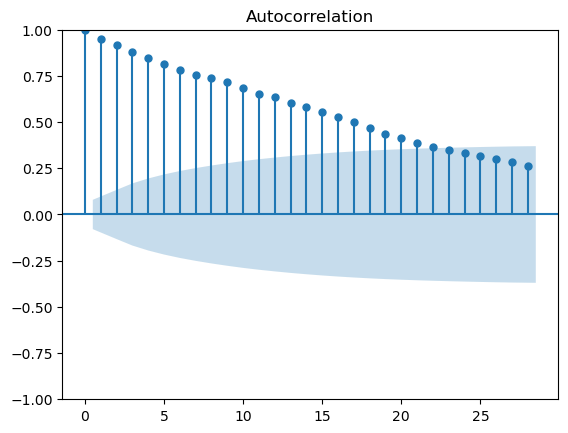

In [39]:
from statsmodels.graphics.tsaplots import plot_acf

plot_acf(df['Combination'].dropna())
plt.show()
